In [1]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression

In [6]:
#Ship Name     1-20
#Cruise Line   21-40
#Age (as of 2013)   46-48
#Tonnage (1000s of tons)   50-56
#passengers (100s)   58-64
#Length (100s of feet)  66-72
#Cabins  (100s)   74-80
#Passenger Density   82-88
#Crew  (100s)   90-96

cruise_ship = pd.read_fwf('cruise_ship.txt', colspecs=[(0,20),(20,40),(45,48),(49,56),(57,64),(65,72),(73,80),(81,88),(89,96)])
print(cruise_ship)

         Ship Name      Cruise Line  Ag     Tons   Pass   Leng  Cabin  P Den  \
0            Quest          Azamara   6   30.277   6.94   5.94   3.55  42.64   
1      Celebration         Carnival  26   47.262  14.86   7.22   7.43  31.80   
2         Conquest         Carnival  11  110.000  29.74   9.53  14.88  36.99   
3          Destiny         Carnival  17  101.353  26.42   8.92  13.21  38.36   
4          Ecstasy         Carnival  22   70.367  20.52   8.55  10.20  34.29   
5          Elation         Carnival  15   70.367  20.52   8.55  10.20  34.29   
6          Fantasy         Carnival  23   70.367  20.56   8.55  10.22  34.23   
7      Fascination         Carnival  19   70.367  20.52   8.55  10.20  34.29   
8          Freedom         Carnival   6  110.239  37.00   9.51  14.87  29.79   
9            Glory         Carnival  10  110.000  29.74   9.51  14.87  36.99   
10         Holiday         Carnival  28   46.052  14.52   7.27   7.26  31.72   
11     Imagination         Carnival  18 

In [8]:
#Dataframe for cruise ships
ShipInfodf = pd.DataFrame(cruise_ship)

In [9]:
#creating arrays for Crew and Passenger sections
Crew_arr = np.array(ShipInfodf['Crew'])
Pass_arr = np.array(ShipInfodf['Pass'])

#creating a ratio of Passenger per Crew
PCratio = Pass_arr/Crew_arr

#creating an array for Length of the ship and adjusting to the accurate length in m
Leng_arr = np.array(ShipInfodf['Leng'])
Length = Leng_arr*100
print(PCratio)
print(Length)

[1.95492958 2.21791045 1.55706806 2.642      2.23043478 2.23043478
 2.23478261 2.23043478 3.2173913  2.5637931  2.2        2.23043478
 2.23043478 2.28387097 2.5637931  2.06213592 2.23043478 2.28387097
 2.23043478 2.06413994 2.758      2.5637931  2.39826087 2.06293706
 2.03403403 2.07920792 2.03403403 2.07040704 2.03403403 4.25373134
 2.03403403 1.56666667 2.03880597 2.02       2.29782609 2.1102107
 2.3490566  2.54681648 2.54681648 2.01558442 2.29782609 2.24
 3.48623853 2.51697128 1.69811321 1.72477064 1.94462541 2.09098164
 2.22222222 1.85185185 1.85185185 2.3        2.63       2.26929982
 2.29056604 2.19477435 1.62826087 2.04968944 2.15306122 2.15306122
 2.15306122 2.56684492 2.44117647 2.71186441 2.31       2.23714286
 3.01523229 2.22857143 2.3364486  2.58358663 2.2972973  3.20538721
 2.06052632 2.23829787 2.03636364 2.84690554 2.15870153 2.04
 2.4109589  2.5025     2.144      2.38730159 1.50461538 3.02631579
 2.08759124 2.84690554 1.71       1.71       1.71       2.36
 2.26467204 2.

In [11]:
CarnInfodf = ShipInfodf.loc[ShipInfodf['Cruise Line']=='Carnival']

In [12]:
#creatting arrays for Crew and Passenger sections of the Carnival Ships
Carn_Crew_arr = np.array(CarnInfodf['Crew'])
Carn_Pass_arr = np.array(CarnInfodf['Pass'])

#creating a ratio of Passenger per Crew for Carnival
Carn_PCratio = Carn_Pass_arr/Carn_Crew_arr

#creating an array for Length of the Carnival ships and adjusting to the accurate length in m
Carn_Leng_arr = np.array(CarnInfodf['Leng'])
Carn_Length = Carn_Leng_arr*100
print(Carn_PCratio)
print(Carn_Length)

[2.21791045 1.55706806 2.642      2.23043478 2.23043478 2.23478261
 2.23043478 3.2173913  2.5637931  2.2        2.23043478 2.23043478
 2.28387097 2.5637931  2.06213592 2.23043478 2.28387097 2.23043478
 2.06413994 2.758      2.5637931  2.39826087]
[722. 953. 892. 855. 855. 855. 855. 951. 951. 727. 855. 855. 963. 951.
 963. 855. 963. 855. 963. 893. 952. 893.]


In [13]:
# Fitting Linear Regression to the dataset 
PossAnswer = np.polyfit(Length, PCratio, 3)
print(PossAnswer)
f = np.poly1d(PossAnswer)

[ 1.40046341e-09 -3.82653834e-06  4.81863473e-03  1.55846423e-01]


In [17]:
#creating new x and y with the polyfit array
x_new = np.linspace(200, 1200, 20)
print(x_new)
y_new = f(x_new)

[ 200.          252.63157895  305.26315789  357.89473684  410.52631579
  463.15789474  515.78947368  568.42105263  621.05263158  673.68421053
  726.31578947  778.94736842  831.57894737  884.21052632  936.84210526
  989.47368421 1042.10526316 1094.73684211 1147.36842105 1200.        ]


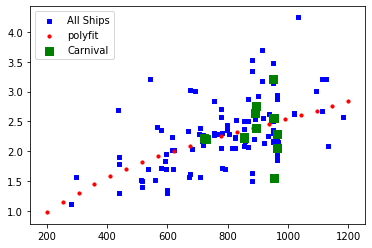

In [19]:
#creating range for x and y
x = range(200, 1200)
y = range(0, 5)
#plotting figure and adding in subplot ability so more than one set of data can be inputed
fig = plt.figure()
ax1 = fig.add_subplot(111)
#first
ax1.scatter(Length, PCratio, s=10, c='b', marker="s", label='All Ships')
ax1.scatter(x_new, y_new, s=10, c='r', marker="o", label='polyfit')
ax1.scatter(Carn_Length, Carn_PCratio, s=50, c='g', marker="s", label='Carnival')
plt.legend(loc='upper left');
plt.show()